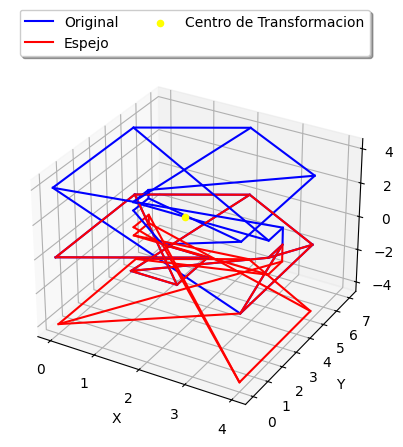

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def rotacion_2D(punto, angulo, centro):
    x, y = punto
    cx, cy = centro
    angulo_rad = np.radians(angulo)
    x_rotacion = cx + np.cos(angulo_rad) * (x - cx) - np.sin(angulo_rad) * (y - cy)
    y_rotacion = cy + np.sin(angulo_rad) * (x - cx) + np.cos(angulo_rad) * (y - cy)
    return x_rotacion, y_rotacion

def plot_figura_2D(puntos, puntos_transformados, centro, transformacion):
    plt.figure()
    plt.plot([p[0] for p in puntos], [p[1] for p in puntos], label='Original')
    plt.plot([p[0] for p in puntos_transformados], [p[1] for p in puntos_transformados], label=transformacion)
    plt.plot(centro[0], centro[1], 'ro', label='Centro de Transformacion', color="purple")  
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('2D - ' + transformacion)
    plt.legend()
    plt.axis('equal')
    plt.show()

def rotacion_3D(punto, angulo, centro):
    x, y, z = punto
    cx, cy, cz = centro
    angulo_rad = np.radians(angulo)
    rotacion_matriz = np.array([[np.cos(angulo_rad), -np.sin(angulo_rad), 0],
                                [np.sin(angulo_rad), np.cos(angulo_rad), 0],
                                [0, 0, 1]])
    rotacion_punto = np.dot(rotacion_matriz, np.array([x - cx, y - cy, z - cz])) + np.array([cx, cy, cz])
    return rotacion_punto

def plot_figura_3D(puntos, puntos_rotados, centro, transformacion):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot([p[0] for p in puntos], [p[1] for p in puntos], [p[2] for p in puntos], label='Original', color='blue')
    ax.plot([p[0] for p in puntos_rotados], [p[1] for p in puntos_rotados], [p[2] for p in puntos_rotados], label=transformacion, color='red')
    ax.scatter(centro[0], centro[1], centro[2], label='Centro de Transformacion', color='yellow')
    for i in range(0, len(puntos)//2):
        if puntos[i] != (-1, 4, 0) and puntos[i+len(puntos)//2] != (-1, 2, 0.5):
            ax.plot([puntos[i][0], puntos[i+len(puntos)//2][0]], 
                    [puntos[i][1], puntos[i+len(puntos)//2][1]], 
                    [puntos[i][2], puntos[i+len(puntos)//2][2]], color='blue')
            ax.plot([puntos_rotados[i][0], puntos_rotados[i+len(puntos)//2][0]], 
                    [puntos_rotados[i][1], puntos_rotados[i+len(puntos)//2][1]], 
                    [puntos_rotados[i][2], puntos_rotados[i+len(puntos)//2][2]], color='red')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(transformacion + ' 3D')
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), shadow=True, ncol=2)
    plt.show()

def espejo_2D(puntos):
    puntos_espejo = []
    for punto in puntos:
        puntos_espejo.append((punto[0], -punto[1]))
    return puntos_espejo


def trasladar_puntos(puntos, tx, ty, tz=0):
    if len(puntos[0]) == 2:  # Si los puntos son 2D
        puntos_traslados = [(p[0] + tx, p[1] + ty) for p in puntos]
    elif len(puntos[0]) == 3:  # Si los puntos son 3D
        puntos_traslados = [(p[0] + tx, p[1] + ty, p[2] + tz) for p in puntos]
    else:
        raise ValueError("Los puntos deben ser 2D o 3D.")
    return puntos_traslados


opcion = input("Selecciona la dimensión (2: 2D, 3: 3D): ")

if opcion == '2':
    opcion_2D = input("Selecciona la transformación (1: traslación, 2: rotación, 3: espejo): ")

    if opcion_2D == '1':
        tx = float(input("Ingrese el desplazamiento en el eje X: "))
        ty = float(input("Ingrese el desplazamiento en el eje Y: "))
        puntos_figura_2D = [(-1, 1), (-1, -4), (-5, -4), (-5, 2), (0, 5), (5, 2), (5, -4), (1, -4), (1, 1), (-1, 1)]
        centro_2D = (0, 0)
        puntos_traslados_2D = trasladar_puntos(puntos_figura_2D, tx, ty)
        plot_figura_2D(puntos_figura_2D, puntos_traslados_2D, centro_2D, 'Traslacion')
        
    elif opcion_2D == '2':
        angulo = float(input("Ingrese el ángulo de rotación en grados: "))
        puntos_figura_2D = [(-1, 1), (-1, -4), (-5, -4), (-5, 2), (0, 5), (5, 2), (5, -4), (1, -4), (1, 1), (-1, 1)]
        centro_2D = (0, 0)
        puntos_rotados_2D = [rotacion_2D(punto, angulo, centro_2D) for punto in puntos_figura_2D]
        plot_figura_2D(puntos_figura_2D, puntos_rotados_2D, centro_2D, 'Rotacion')

    elif opcion_2D == '3':
        puntos_figura_2D = [(-1, 1), (-1, -4), (-5, -4), (-5, 2), (0, 5), (5, 2), (5, -4), (1, -4), (1, 1), (-1, 1)]
        puntos_espejo_2D = espejo_2D(puntos_figura_2D)
        centro_2D = (0, 0)
        plot_figura_2D(puntos_figura_2D, puntos_espejo_2D, centro_2D, 'Espejo')

    else:
        print("Opción inválida.")

elif opcion == '3':
    opcion_3D = input("Selecciona la transformación (1: traslación, 2: rotación, 3: espejo): ")

    if opcion_3D == '1':
        tx = float(input("Ingrese el desplazamiento en el eje X: "))
        ty = float(input("Ingrese el desplazamiento en el eje Y: "))
        tz = float(input("Ingrese el desplazamiento en el eje Z: "))

        # Definir los puntos de la casa en 3D
        puntos_figura_3D = [
            (0, 0, 0), (0, 5, 0), (2, 7, 0), (4, 5, 0), (4, 0, 0),  # Base de la casa
            (0, 0, 4), (0, 5, 4), (2, 7, 4), (4, 5, 4), (4, 0, 4),  # Techo de la casa
            (1.5, 2.5, 0), (2.5, 2.5, 0), (2.5, 0.5, 0), (1.5, 0.5, 0),  # Puerta
            (3.5, 3.5, 0), (3.5, 4.5, 0), (3.5, 4.5, 1), (3.5, 3.5, 1),  # Ventana
            (0.5, 3.5, 1), (0.5, 4.5, 1), (0.5, 4.5, 0.5), (0.5, 3.5, 0.5)  # Ventana
        ]

        # Aplicar la traslación a los puntos de la casa en 3D
        puntos_traslados_3D = trasladar_puntos(puntos_figura_3D, tx, ty, tz)

        # Definir el centro de la casa trasladada
        centro_3D = (2 + tx, 2.5 + ty, 2 + tz)

        # Graficar la casa original y su traslación
        plot_figura_3D(puntos_figura_3D, puntos_traslados_3D, centro_3D, 'Traslacion')

    elif opcion_3D == '2':
        angulo = float(input("Ingrese el ángulo de rotación en grados: "))
        puntos_figura_3D = [
            (0, 0, 0), (0, 5, 0), (2, 7, 0), (4, 5, 0), (4, 0, 0), # Base de la casa
            (0, 0, 4), (0, 5, 4), (2, 7, 4), (4, 5, 4), (4, 0, 4), # Techo de la casa
            (1.5, 2.5, 0), (2.5, 2.5, 0), (2.5, 0.5, 0), (1.5, 0.5, 0), # Puerta
            (3.5, 3.5, 0), (3.5, 4.5, 0), (3.5, 4.5, 1), (3.5, 3.5, 1), # Ventana
            (0.5, 3.5, 1), (0.5, 4.5, 1), (0.5, 4.5, 0.5), (0.5, 3.5, 0.5) # Ventana
        ]
        centro_3D = (2, 2.5, 2)
        puntos_rotados_3D = [rotacion_3D(punto, angulo, centro_3D) for punto in puntos_figura_3D]
        plot_figura_3D(puntos_figura_3D, puntos_rotados_3D, centro_3D, 'Rotacion')

    elif opcion_3D == '3':
        puntos_figura_3D = [
            (0, 0, 0), (0, 5, 0), (2, 7, 0), (4, 5, 0), (4, 0, 0), # Base de la casa
            (0, 0, 4), (0, 5, 4), (2, 7, 4), (4, 5, 4), (4, 0, 4), # Techo de la casa
            (1.5, 2.5, 0), (2.5, 2.5, 0), (2.5, 0.5, 0), (1.5, 0.5, 0), # Puerta
            (3.5, 3.5, 0), (3.5, 4.5, 0), (3.5, 4.5, 1), (3.5, 3.5, 1), # Ventana
            (0.5, 3.5, 1), (0.5, 4.5, 1), (0.5, 4.5, 0.5), (0.5, 3.5, 0.5) # Ventana
        ]
        puntos_espejo_3D = espejo_3D(puntos_figura_3D)
        centro_3D = (2, 2.5, 2)
        plot_figura_3D(puntos_figura_3D, puntos_espejo_3D, centro_3D, 'Espejo')

    else:
        print("Opción inválida.")

else:
    print("Opción inválida.")